In [2]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
#from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#Load movie names and movie ratings
movies = pd.read_csv('C:\Users\lingaselvan\Documents\Python Scripts\Data\movies.csv')
ratings = pd.read_csv('C:\Users\lingaselvan\Documents\Python Scripts\Data\\ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)

M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape

df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [3]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0013947  -0.00276421 -0.00195661 ..., -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...,  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ..., -0.00612653 -0.0022929
  -0.00753398]
 ..., 
 [-0.00858289  0.14004611 -0.00612653 ...,  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...,  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...,  0.14005644  0.01676203
   1.0013947 ]]


In [4]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -1.34830861e-04 +0.00000000e+00j   5.76715196e-04 +0.00000000e+00j
    4.83014783e-05 +0.00000000e+00j ...,  -2.00875119e-20 +0.00000000e+00j
   -3.42232536e-21 -2.32705339e-20j  -3.42232536e-21 +2.32705339e-20j]
 [  5.61303451e-04 +0.00000000e+00j  -1.11493526e-02 +0.00000000e+00j
    8.85798170e-03 +0.00000000e+00j ...,   2.25590501e-19 +0.00000000e+00j
    8.76438674e-21 +1.83977850e-19j   8.76438674e-21 -1.83977850e-19j]
 [  4.58686517e-04 +0.00000000e+00j  -2.39083484e-03 +0.00000000e+00j
    6.58309436e-04 +0.00000000e+00j ...,  -3.38659360e-18 +0.00000000e+00j
   -2.32000496e-19 -2.57106590e-18j  -2.32000496e-19 +2.57106590e-18j]
 ..., 
 [  5.22202072e-03 +0.00000000e+00j  -5.49944367e-03 +0.00000000e+00j
    5.16164779e-03 +0.00000000e+00j ...,   7.58701041e-20 +0.00000000e+00j
    7.32584282e-20 -7.97443638e-20j   7.32584282e-20 +7.97443638e-20j]
 [  8.97514078e-04 +0.00000000e+00j  -1.14918748e-02 +0.00000000e+00j
    9.41277803e-03 +0.00000000e+00j ...,  -2.

In [5]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1541.6665576
423.920459985
319.074475077
279.330357581
251.63844083
218.624399732
154.615869113
138.603967452
137.666978563
119.370146541
115.279556663
105.405940301
97.8420118675
96.7201266059
93.3964721132
87.7491937345
87.54664688
85.9337125736
72.85051428
70.3715467934
64.453102033
63.7860316455
62.1126059067
60.0806616288
57.6725507981
56.490104253
55.4818356319
53.781619651
51.8760572617
49.731368452
48.2619971769
47.2520176765
44.6806508933
44.0889011736
42.6699230904
41.1655074355
40.1389432151
38.6037728983
37.9016832638
37.0577948526
35.9906290742
35.3647967366
34.9391400323
34.4495926032
33.3468072889
33.1086232054
32.2949243108
32.2303217898
31.6180737952
30.9803646047
30.1826310439
29.6425590756
29.4836245945
29.1301658252
28.7691890268
28.1780650419
27.508085094
26.8556550399
26.466325034
26.4942727187
26.1936940128
25.9763166886
25.8208666394
25.4782031737
25.1552068701
24.9002111537
24.363083301
23.7513273403
23.4815511167
22.9774222701


7.25596918503e-14
7.25596918503e-14
7.41306699061e-14
7.41306699061e-14
6.59260376304e-14
6.59260376304e-14
6.84897668426e-14
6.84897668426e-14
6.74862814692e-14
6.74862814692e-14
7.35605624419e-14
7.35605624419e-14
7.3693477313e-14
7.3693477313e-14
7.40017469727e-14
7.40017469727e-14
7.36322016533e-14
7.04621525453e-14
7.04621525453e-14
7.40476113958e-14
7.40476113958e-14
5.43436613614e-14
5.43436613614e-14
5.41092761811e-14
5.41092761811e-14
7.28867389245e-14
7.28867389245e-14
7.35440579862e-14
7.35440579862e-14
7.26565720718e-14
7.26565720718e-14
6.92670078949e-14
6.92670078949e-14
7.1520051655e-14
7.1520051655e-14
7.20409700096e-14
7.20409700096e-14
7.29723470785e-14
7.29723470785e-14
7.22023648387e-14
7.22023648387e-14
5.59199471265e-14
5.59199471265e-14
6.98570600713e-14
6.98570600713e-14
7.25841004704e-14
7.25841004704e-14
7.14301775187e-14
7.14301775187e-14
7.18417403772e-14
7.18417403772e-14
7.11739693933e-14
7.11739693933e-14
7.18327105787e-14
7.18327105787e-14
7.07387862938e

2.05781659025e-14
2.05781659025e-14
2.18480293739e-14
2.18480293739e-14
2.20591868143e-14
2.20591868143e-14
2.20647097269e-14
2.20647097269e-14
1.96598019813e-14
1.96598019813e-14
2.15639276895e-14
2.15639276895e-14
2.19577803638e-14
2.09133567601e-14
2.09133567601e-14
2.10813990258e-14
2.10813990258e-14
2.16400528676e-14
2.16400528676e-14
2.09923900744e-14
2.09923900744e-14
1.89218136189e-14
1.89218136189e-14
2.17463519659e-14
2.17463519659e-14
2.03096728309e-14
2.03096728309e-14
2.17642527882e-14
2.17642527882e-14
2.11682005524e-14
2.11682005524e-14
2.10719678513e-14
2.10719678513e-14
2.13513771844e-14
2.13513771844e-14
2.14699469102e-14
1.98799284283e-14
1.98799284283e-14
2.09297683205e-14
2.09297683205e-14
2.15399276826e-14
2.15399276826e-14
2.19307182514e-14
2.11044458306e-14
2.11044458306e-14
2.15845781553e-14
2.15845781553e-14
2.15612438025e-14
2.15612438025e-14
1.72556936464e-14
1.72556936464e-14
1.80400276173e-14
1.80400276173e-14
2.1336759009e-14
2.1336759009e-14
2.0420388860

3.73144131738e-15
3.73144131738e-15
4.91007222173e-15
4.91007222173e-15
2.75996566268e-15
2.75996566268e-15
4.75917090904e-15
4.75917090904e-15
4.42367008497e-15
4.42367008497e-15
5.04571336855e-15
5.04571336855e-15
4.02698744685e-15
4.02698744685e-15
4.01241950414e-15
4.01241950414e-15
4.74441156536e-15
4.74441156536e-15
4.42014931984e-15
4.42014931984e-15
5.04782385166e-15
5.04782385166e-15
2.61659147919e-15
2.61659147919e-15
3.1354396188e-15
3.1354396188e-15
3.37208806074e-15
3.37208806074e-15
3.5630420617e-15
3.5630420617e-15
5.06481016729e-15
5.06481016729e-15
4.89081035604e-15
4.89081035604e-15
4.52509350519e-15
4.52509350519e-15
4.72750210042e-15
4.72750210042e-15
4.87508619983e-15
4.06554267072e-15
4.06554267072e-15
3.79635474919e-15
3.79635474919e-15
2.79246660744e-15
2.79246660744e-15
2.96130995467e-15
2.96130995467e-15
3.29108634368e-15
3.29108634368e-15
4.92265687783e-15
4.92265687783e-15
4.77316914901e-15
4.77316914901e-15
2.86560534639e-15
2.86560534639e-15
4.41732770515e

1.07614601457e-29
1.05986931846e-29
1.05986931846e-29
1.05343166037e-29
1.05343166037e-29
1.11132335386e-29
1.11132335386e-29
1.10476798417e-29
1.10476798417e-29
1.07536735034e-29
1.07536735034e-29
1.10852714017e-29
1.10852714017e-29
1.07253804162e-29
1.07253804162e-29
1.05119151961e-29
1.05119151961e-29
1.05233150466e-29
1.05233150466e-29
1.03629605229e-29
1.03629605229e-29
1.03761465314e-29
1.03761465314e-29
1.06864959257e-29
1.04526495771e-29
1.04526495771e-29
1.02625188244e-29
1.02625188244e-29
1.02174633065e-29
1.02174633065e-29
1.02584861406e-29
1.02584861406e-29
1.00925839726e-29
1.00925839726e-29
1.00752550559e-29
1.00752550559e-29
9.92381995977e-30
9.92381995977e-30
9.90687905033e-30
9.90687905033e-30
9.81601025304e-30
9.81601025304e-30
9.35859256157e-30
9.35859256157e-30
9.56954946459e-30
9.56954946459e-30
9.05793897937e-30
9.05793897937e-30
9.33850765923e-30
9.33850765923e-30
9.39094184899e-30
9.39094184899e-30
8.96357617811e-30
8.96357617811e-30
9.1310276625e-30
9.131027662

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(df1)
print pca.explained_variance_ratio_ 

[ 0.13379809  0.03977444]


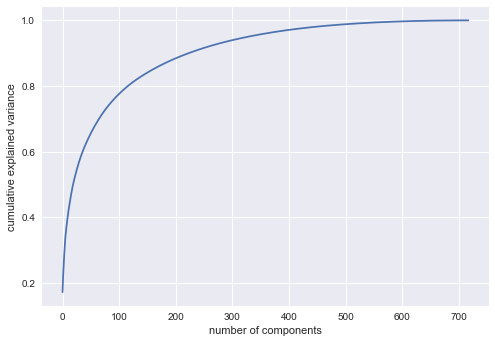

In [11]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()